In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import uniform
import math
# powerful library sklearn
from sklearn.decomposition import PCA
pi = math.pi
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA

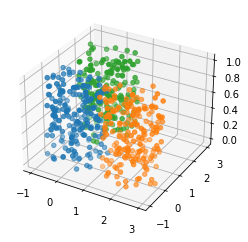

In [19]:
# Create the data from distributions and show it on graph
N_1 = 0
N_2 = 0
N_3 = 0

x_1 = []
y_1 = []
z_1 = []

x_2 = []
y_2 = []
z_2 = []

x_3 = []
y_3 = []
z_3 = []

# Generate data
while (N_1 < 200):
    x = uniform(-1,1)
    y = uniform(-1,1)
    z = uniform(-1,1)
    if(z>0):
        if (y*y + x*x < 1):
            x_1.append(x)
            y_1.append(y)
            z_1.append(z)
            N_1+=1

while (N_2 < 200):
    x = uniform(1,3)
    y = uniform(-1,1)
    z = uniform(-1,1)
    if(z>0):
        if (y*y + (x-2)*(x-2) < 1):
            x_2.append(x)
            y_2.append(y)
            z_2.append(z)
            N_2+=1
        
while (N_3 < 200):
    x = uniform(-1,1)
    y = uniform(1,3)
    z = uniform(-1,1)
    if(z>0):
        if ((y-2)*(y-2) + x*x < 1):
                x_3.append(x)
                y_3.append(y)
                z_3.append(z)
                N_3+=1

# Let's first visualise data
ax = plt.axes(projection='3d')
# Diff colors to uncerstand better
ax.scatter3D(x_1, y_1, z_1)      
ax.scatter3D(x_2, y_2, z_2)
ax.scatter3D(x_3, y_3, z_3)

In [20]:
# Problem 1(a)

# Store all data in single matrix
A = []
for i in range(200):
    A.append([x_1[i],y_1[i],z_1[i]])
    
for i in range(200):
    A.append([x_2[i],y_2[i],z_2[i]])
    
for i in range(200):
    A.append([x_3[i],y_3[i],z_3[i]])

# Call PCA using sklearn library which calculates automatically
pca = PCA(3)
pca.fit(A)

# just to be curious let's see egenvalues
print("Eigenvalues are:")
print(pca.explained_variance_)
print("###################################################")
print("Eigenvectors are:")
# access eigenvectors
print(pca.components_)


Eigenvalues are:
[1.59434037 0.73375256 0.0807913 ]
###################################################
Eigenvectors are:
[[-0.73551904  0.67749683 -0.0031276 ]
 [-0.67725436 -0.73511482  0.03054086]
 [-0.01839219 -0.02458157 -0.99952863]]


##### 

In [21]:
# Problem 1(c)

# find average of list
def mean(x1,x2,x3):
    m = sum(x1)/len(x1) + sum(x2)/len(x2) + sum(x3)/len(x3)
    return m

# normalize vector
def normalize(x,y,z):
    r = math.sqrt(x*x+y*y+z*z)
    return [x/r,y/r,z/r]

mx = mean(x_1,x_2,x_3)
my = mean(y_1,y_2,y_3)
mz = mean(z_1,z_2,z_3)


X = []  # it is actually X.T. I made it so for simplicity

for i in range(200):
    X.append([x_1[i]-mx,y_1[i]-my,z_1[i]-mz])
    X.append([x_2[i]-mx,y_2[i]-my,z_2[i]-mz])
    X.append([x_3[i]-mx,y_3[i]-my,z_3[i]-mz])

w = normalize(uniform(0,1), uniform(0,1), uniform(0,1))

etha = 0.1
for i in range(1000):
    # For each point as it is online learning
    for j in range(len(X)):
        # Make update
        y = w[0]*X[j][0] + w[1]*X[j][1] + w[2]*X[j][2]    
        w[0] = w[0] + etha*y*(X[j][0] - y*w[0])
        w[1] = w[1] + etha*y*(X[j][1] - y*w[1])
        w[2] = w[2] + etha*y*(X[j][2] - y*w[2])

PC1 = w
print("The first PCA component is:")
print(PC1)

The first PCA component is:
[0.7670790954819078, 0.5346098806649991, 0.427356363705443]


In [22]:
# Problem 1(e)
wi = normalize(uniform(0,1), uniform(0,1), uniform(0,1))
k = (wi[0]*PC1[0] + wi[1]*PC1[1] + wi[2]*PC1[2])
w = [wi[0]*k, wi[1]*k, wi[2]*k]
w = normalize(w[0], w[1], w[2])

X = []  # it is actually X.T. I made it so for simplicity

for i in range(200):
    X.append([x_1[i]-mx,y_1[i]-my,z_1[i]-mz])
    X.append([x_2[i]-mx,y_2[i]-my,z_2[i]-mz])
    X.append([x_3[i]-mx,y_3[i]-my,z_3[i]-mz])
    
etha = 0.1
for i in range(1000):
    # For each point as it is online learning
    for j in range(len(X)):
        
        # Delete the coordinate along PC1
        a = [X[j][0], X[j][1], X[j][2]]
        b = PC1[0]*X[j][0] + PC1[1]*X[j][1] + PC1[2]*X[j][2]
        c = [a[0]-b*PC1[0], a[1]-b*PC1[1], a[2]-b*PC1[2]]
        # Make update
        y = w[0]*c[0] + w[1]*c[1] + w[2]*c[2]    
        w[0] = w[0] + etha*y*(c[0] - y*w[0])
        w[1] = w[1] + etha*y*(c[1] - y*w[1])
        w[2] = w[2] + etha*y*(c[2] - y*w[2])

        
print("The second PCA component is:") 
print(w)


The second PCA component is:
[-0.5770192560339588, 0.8196544009039531, -0.03467371006505267]
